### TS4

Entrega parcial, Gomez Lucero - Waichman Scigliano.

En esta entrega se trabajó en conjunto la TS4.

Primero se implementaron funciones para generar una señal senoidal estocástica, de dos formas: usando $Ω$ y la frecuencia $f_0$. A la señal se le introdujo una variación aleatoria en la frecuencia mediante un parámetro FR, y se normalizó la potencia a 1 W fijando la amplitud en $A_0 = \sqrt{2}$. También se agregó ruido gaussiano normalizado.

Luego, se pasó a la forma matricial, construyendo una matriz de $N \times R$ que incluye las realizaciones de la señal con su correspondiente ruido y variación en frecuencia. A estas señales se les aplicaron distintas ventanas: la default (rectangular), Flattop, Blackman–Harris y Hamming. Para cada caso se calculó la FFT y se analizaron los resultados en frecuencia.

En la segunda parte se trabajó con los estimadores de frecuencia y amplitud. Se implementaron y compararon, generando histogramas para visualizar su desempeño bajo las diferentes ventanas y condiciones de ruido.


En los resultados se puede ver la densidad espectral de potencia, graficada hasta nyquist.

Luego hice dos maneras de calcular los estimadores de amplitud.Los represente con dos histogramas, uno utilizando np.max y otro usando la feta de N//4. 

Y por ultimo el estimador de frecuencia, tambien se mostro con un histograma.

Al final deje una tabla para poder calcular los valores de sesgo y varianza de cada estimadores.

Todo lo que grafico ya tiene incluido el zero padding. 

10.00000
Potencias señal (min / mean / max): 0.9990000541826216 0.9994729265147686 0.999999286903153
¿Potencia ~ 1 en TODAS las columnas? True


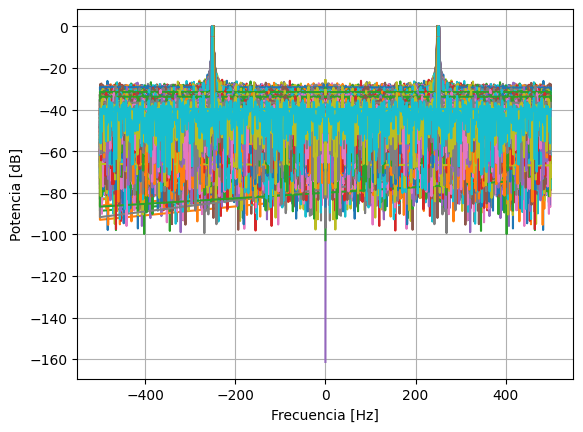

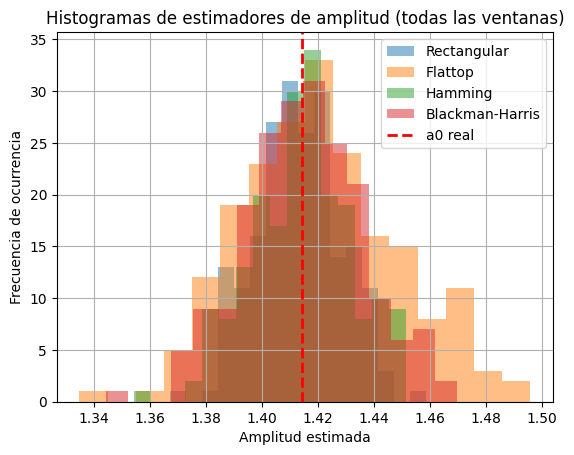

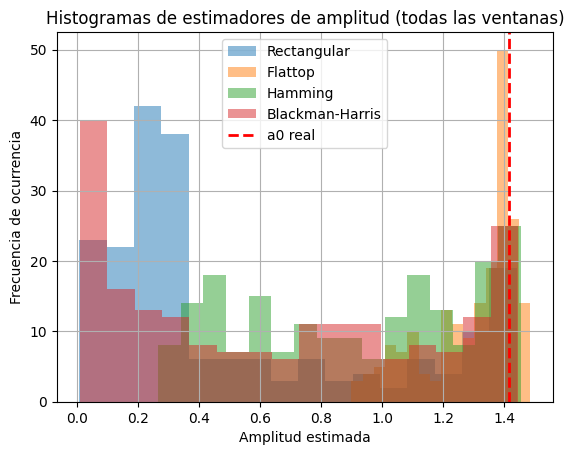

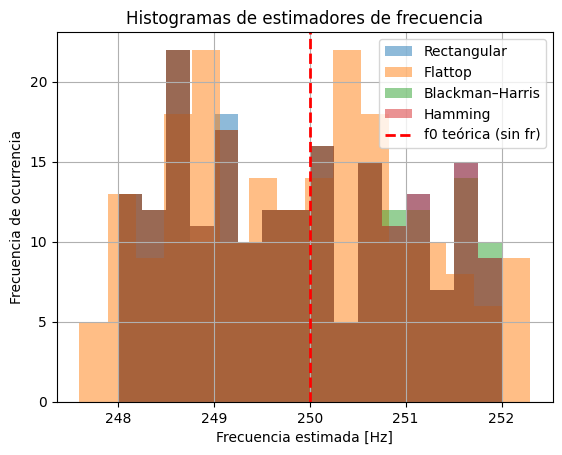


=== TABLA SESGO Y VARIANZA — SNR = 10 dB ===

[AMPLITUD — Pico (×2/CG)]
Ventana                      Sesgo        Varianza          Desvío
------------------------------------------------------------------
Rectangular          -9.545237e-04    2.206331e-04    1.485372e-02
Flattop               6.161359e-03    7.849330e-04    2.801666e-02
Blackman-Harris       7.997250e-04    4.541531e-04    2.131087e-02
Hamming               1.673030e-05    3.166783e-04    1.779546e-02

[AMPLITUD — Bin fijo fs/4]
Ventana                      Sesgo        Varianza          Desvío
------------------------------------------------------------------
Rectangular          -9.094672e-01    2.048067e-01    4.525557e-01
Flattop              -1.205969e-01    2.213701e-02    1.487851e-01
Blackman-Harris      -4.970404e-01    1.365375e-01    3.695098e-01
Hamming              -7.687740e-01    2.456135e-01    4.955941e-01

[FRECUENCIA — Argmax (f̂ − f_true)]
Ventana                      Sesgo        Varianza        

In [1]:
import numpy as np
from numpy.fft import fft
import scipy.signal.windows as window
from numpy.fft import fft, fftshift
import matplotlib.pyplot as plt

N = 1000
fs = N
deltaF = fs/N
Ts = 1/fs
k = np.arange(N)*deltaF
t = np.arange(N)*Ts


def senoidal_estocastica_omega(N, omega0, A0=2): 
    deltaF = fs/N
    k = np.arange(N)*deltaF
    fr = np.random.uniform(-2,2)   
    DeltaOmega = 2*np.pi/N
    omega1 = omega0 + fr * DeltaOmega
    x = A0*np.sin(omega1*k) 
    x = x - x.mean() ## aca le saco la media
    x = x / np.sqrt(np.var(x)) ## aca lo divido por la des estandar
    var_x = np.var(x) ## calculo la varianza
    return x,var_x 

def senoidal_estocastica_fs(N, f0, A0=2, fase=0):
    Ts = 1/fs
    deltaF = fs/N
    t = np.arange(N)*Ts
    fr = np.random.uniform(-2, 2)
    f1 = f0 + fr*deltaF
    #f1 = fs + 0.5
    x = A0*np.sin(2*np.pi*f1*t*deltaF + fase)
    x = x - x.mean() ## aca le saco la media
    x = x / np.sqrt(np.var(x)) ## aca lo divido por la des estandar
    var_x = np.var(x) ## calculo la varianza
    return x,var_x
# ---------- SNR y ruido ----------
#SNRdb = np.random.uniform(3, 10)
#SNRdb = np.random.choice([3, 10])
SNRdb = 10
#SNRdb = 3
print(f"{SNRdb:3.5f}")

def ruido_para_snr(N, SNRdb):
    var_n = 10**(-SNRdb/10)
    std_n = np.sqrt(var_n) ##std desviacion estandar
    n = np.random.normal(0, std_n, N)
    return n#, var_n
"""
#aca tengo mis cosas listas
#x, var_x = senoidal_estocastica_omega(N, omega0 = np.pi/2)
x, var_x = senoidal_estocastica_fs(N, f0 = fs/4)
n, var_ruido = ruido_para_snr(N, SNRdb)
xn = x + n ## modelo de señal

#las varianzas
var_xn = np.var(xn)
print(f"{var_xn:3.1f}")
print(f"{var_x:3.1f}")
print(f"{var_ruido:3.1f}")

# las fft
X = fft(x) * 1/N
Xabs = np.abs(X)

R = fft(n) * 1/N
Rabs = np.abs(R)

Xn = fft(xn) * 1/N
Xnabs = np.abs(Xn)

#graficos
plt.figure()
plt.title("FFT")
plt.xlabel("Muestras ")
plt.ylabel("Db")
plt.grid(True)
#plt.plot(k,  np.log10(Xabs) * 20, label = 'X')
#plt.plot(k, 2* np.log10(Rabs) * 20, label = 'Ruido')
#plt.plot(k, np.log10(Xnabs) * 20, label = 'Modelo de señal')
plt.plot(k, 10*np.log10(2* Xnabs**2) , label = 'dens esp pot') ##densidad espectral de potencia
plt.xlim((0,fs/2))
plt.legend()

"""
N = 1000
fs = N
deltaF = fs/N
Npadding = 10* N
deltaF_Padding = fs/Npadding

Ts = 1/fs
k = np.arange(N)*deltaF
t = np.arange(N)*Ts

a0 = np.sqrt(2)
R = 200
fr = np.random.uniform(-2, 2, R)
f1 = (N / 4 + fr) * deltaF
PP = a0
t = t.reshape(-1,1)

ruido = ruido_para_snr(N, SNRdb)

matriz_t = np.tile(t, (1,R))
matriz_ff = np.tile(f1, (N,1))
matriz_ruido = np.random.normal(0, np.sqrt(10**(-SNRdb/10)), size=(N, R))

matriz_x = a0 * np.sin(2 * np.pi * matriz_ff * matriz_t)
matriz_xn = matriz_x + matriz_ruido

flattop = window.flattop(N).reshape((-1,1))
xx_vent_flt = matriz_xn * flattop

bmh = window.blackmanharris(N).reshape((-1,1))
xx_vent_bmh = matriz_xn * bmh

hamming = window.hamming(N).reshape((-1,1))
xx_vent_hmg = matriz_xn * hamming

# matriz_x: N x R  (solo senoidal, SIN ruido)
P_signal_cols = (1/N) * np.sum(matriz_x**2, axis=0)   # potencia de cada realización
P_signal_mean = P_signal_cols.mean()

print("Potencias señal (min / mean / max):",
      P_signal_cols.min(), P_signal_mean, P_signal_cols.max())

# ¿Está normalizada a 1?
print("¿Potencia ~ 1 en TODAS las columnas?",
      np.allclose(P_signal_cols, 1.0, rtol=1e-3, atol=1e-3))

# FFT 
matriz_Xn1 = (1/N) * fft(matriz_xn, n = Npadding, axis = 0)
matriz_Xn2 = (1/N) * fft(xx_vent_flt, n = Npadding, axis = 0)
matriz_Xn3 = (1/N) * fft(xx_vent_bmh, n = Npadding, axis = 0)
matriz_Xn4 = (1/N) * fft(xx_vent_hmg, n = Npadding, axis = 0)

# Eje de frecuencias CONSISTENTE con fft(..., n=10*N)
freq = np.fft.fftfreq(Npadding, d = 1/fs)

#%%
cg_rect = 1.0
cg_flt  = flattop.mean()
cg_bmh  = bmh.mean()
cg_hmg  = hamming.mean()

# # Estimador de amplitud (valor del pico en cada columna)
amp_est1 = 2*np.max(np.abs(matriz_Xn1), axis=0) / cg_rect
amp_est2 = 2*np.max(np.abs(matriz_Xn2), axis=0) /cg_flt        
amp_est3 = 2*np.max(np.abs(matriz_Xn3), axis=0) /cg_bmh      
amp_est4 = 2*np.max(np.abs(matriz_Xn4), axis=0) /cg_hmg    

sesgo_rect = np.mean(amp_est1) - a0
sesgo_flat = np.mean(amp_est2) - a0
sesgo_bmh  = np.mean(amp_est3) - a0
sesgo_hmg  = np.mean(amp_est4) - a0

var_rect = np.var(amp_est1, ddof=1)
var_flat = np.var(amp_est2, ddof=1)
var_bhm  = np.var(amp_est3, ddof=1)
var_hmg  = np.var(amp_est4, ddof=1)

#estimador pero solamente en la feta de N//4
amp_est1_bin = 2*np.abs(matriz_Xn1[Npadding//4, :]) / cg_rect
amp_est2_bin = 2*np.abs(matriz_Xn2[Npadding//4, :]) / cg_flt
amp_est3_bin = 2*np.abs(matriz_Xn3[Npadding//4, :]) / cg_bmh
amp_est4_bin = 2*np.abs(matriz_Xn4[Npadding//4, :]) / cg_hmg    

sesgo_rect_bin = np.mean(amp_est1_bin) - a0
sesgo_flat_bin = np.mean(amp_est2_bin) - a0
sesgo_bmh_bin  = np.mean(amp_est3_bin) - a0
sesgo_hmg_bin  = np.mean(amp_est4_bin) - a0

var_rect_bin = np.var(amp_est1_bin, ddof=0)
var_flat_bin = np.var(amp_est2_bin, ddof=0)
var_bhm_bin  = np.var(amp_est3_bin, ddof=0)
var_hmg_bin  = np.var(amp_est4_bin, ddof=0)

#%%
# Parte positiva de cada ventana
X1p = matriz_Xn1[:Npadding//2+1, :]
X2p = matriz_Xn2[:Npadding//2+1, :]
X3p = matriz_Xn3[:Npadding//2+1, :]
X4p = matriz_Xn4[:Npadding//2+1, :]

idx1 = np.argmax(np.abs(X1p), axis=0)
idx2 = np.argmax(np.abs(X2p), axis=0)
idx3 = np.argmax(np.abs(X3p), axis=0)
idx4 = np.argmax(np.abs(X4p), axis=0)

frec_est1 = idx1 * deltaF_Padding #- f1
frec_est2 = idx2 * deltaF_Padding #- f1
frec_est3 = idx3 * deltaF_Padding #- f1
frec_est4 = idx4 * deltaF_Padding #- f1

# Frecuencia verdadera por realización (vector R,)
#f1  # (= (N/4 + fr) * deltaF)

# Errores por realización
err1 = frec_est1 - f1
err2 = frec_est2 - f1
err3 = frec_est3 - f1
err4 = frec_est4 - f1

sesgo= np.mean(frec_est1) - np.mean(f1)

# Sesgo y varianza muestral (¡escalares!)
sesgo_rect1 = float(err1.mean());  var_rect1 = float(err1.var(ddof=0))
sesgo_flat2 = float(err2.mean());  var_flat2 = float(err2.var(ddof=0))
sesgo_bmh3  = float(err3.mean());  var_bhm3  = float(err3.var(ddof=0))
sesgo_hmg4  = float(err4.mean());  var_hmg4  = float(err4.var(ddof=0))

#%%
#Graficar TODAS las realizaciones (R curvas) sin promediar
plt.figure()
plt.plot(freq, 10*np.log10(np.abs(matriz_Xn1)**2) + 3)
plt.plot(freq, 10*np.log10(np.abs(matriz_Xn2)**2) + 3)
plt.plot(freq, 10*np.log10(np.abs(matriz_Xn3)**2) + 3)
plt.plot(freq, 10*np.log10(np.abs(matriz_Xn4)**2) + 3)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Potencia [dB]')
plt.xlim(0,fs/2)
plt.grid(True)


plt.figure()
plt.hist(amp_est1, bins=16, alpha=0.5, label="Rectangular")
plt.hist(amp_est2, bins=16, alpha=0.5, label="Flattop")
plt.hist(amp_est4, bins=16, alpha=0.5, label="Hamming")
plt.hist(amp_est3, bins=16, alpha=0.5, label="Blackman-Harris")
plt.axvline(a0, color='red', linestyle='--', linewidth=2, label="a0 real")
plt.title("Histogramas de estimadores de amplitud (todas las ventanas)")
plt.xlabel("Amplitud estimada")
plt.ylabel("Frecuencia de ocurrencia")
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.hist(amp_est1_bin, bins=16, alpha=0.5, label="Rectangular")
plt.hist(amp_est2_bin, bins=16, alpha=0.5, label="Flattop")
plt.hist(amp_est3_bin, bins=16, alpha=0.5, label="Hamming")
plt.hist(amp_est4_bin, bins=16, alpha=0.5, label="Blackman-Harris")
plt.axvline(a0, color='red', linestyle='--', linewidth=2, label="a0 real")
plt.title("Histogramas de estimadores de amplitud (todas las ventanas)")
plt.xlabel("Amplitud estimada")
plt.ylabel("Frecuencia de ocurrencia")
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.hist(frec_est1, bins=16, alpha=0.5, label="Rectangular")
plt.hist(frec_est2, bins=16, alpha=0.5, label="Flattop")
plt.hist(frec_est3, bins=16, alpha=0.5, label="Blackman–Harris")
plt.hist(frec_est4, bins=16, alpha=0.5, label="Hamming")
plt.axvline(fs/4, color='red', ls='--', lw=2, label='f0 teórica (sin fr)')
plt.title("Histogramas de estimadores de frecuencia")
plt.xlabel("Frecuencia estimada [Hz]")
plt.ylabel("Frecuencia de ocurrencia")
plt.legend(); plt.grid(True); plt.show()


#%% TABLA

def _fmt(x):
    return f"{float(np.asarray(x)) : .6e}"

def _print_block(title, rows):
    print(f"\n[{title}]")
    print(f"{'Ventana':<18}{'Sesgo':>16}{'Varianza':>16}{'Desvío':>16}")
    print("-"*66)
    for (vent, bias, var) in rows:
        std = np.sqrt(var)
        print(f"{vent:<18}{_fmt(bias):>16}{_fmt(var):>16}{_fmt(std):>16}")

try:
    print(f"\n=== TABLA SESGO Y VARIANZA — SNR = {SNRdb} dB ===")
except NameError:
    print("\n=== TABLA SESGO Y VARIANZA ===")

# Amplitud — pico (×2/CG)
rows_amp_peak = [
    ("Rectangular",     sesgo_rect,     var_rect),
    ("Flattop",         sesgo_flat,     var_flat),
    ("Blackman-Harris", sesgo_bmh,      var_bhm),
    ("Hamming",         sesgo_hmg,      var_hmg),
]
_print_block("AMPLITUD — Pico (×2/CG)", rows_amp_peak)

# Amplitud — bin fijo fs/4 (scalloping)
rows_amp_bin = [
    ("Rectangular",     sesgo_rect_bin,     var_rect_bin),
    ("Flattop",         sesgo_flat_bin,     var_flat_bin),
    ("Blackman-Harris", sesgo_bmh_bin,      var_bhm_bin),
    ("Hamming",         sesgo_hmg_bin,      var_hmg_bin),
]
_print_block("AMPLITUD — Bin fijo fs/4", rows_amp_bin)

# Frecuencia — argmax (error por realización)
rows_freq = [
    ("Rectangular",     sesgo_rect1,    var_rect1),
    ("Flattop",         sesgo_flat2,    var_flat2),
    ("Blackman-Harris", sesgo_bmh3,     var_bhm3),
    ("Hamming",         sesgo_hmg4,     var_hmg4),
]
_print_block("FRECUENCIA — Argmax (f̂ − f_true)", rows_freq)


